Buenas buenas, proyecto de calculito numeriquito por:
Angel De Crescenzo 27.851.257
Regina Escalona 30.681.671

In [ ]:
Como obtenemos los datos es usando una API de datos meteorologicos mundiales usando el
"Location" como una variable String que es colocando el nombre de una ciudad en INGLES

"Start_date" fecha inicio del rango
"End_date" fecha de fin del rango

url es donde se va a llamar a la api en la web y colocando las variables en sus respectivos lugares
en la direccion usando por ejemplo "$(location)"

la api da un archivo JSON para leer todo en String, al leerlo solo buscamos una variable
que es la temperatura media y de una vez lo pasamos a un float de 64

In [45]:
using HTTP
using JSON

location = "Schweinfurt"

start_date = "2023-01-20"
end_date = "2023-01-26" 

url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?q=$(location)&tp=24&date=$(start_date)&enddate=$(end_date)&format=json&key=790e4819ffc841c5b1810355241106"

response = HTTP.request("GET", url)

if response.status == 200
    data = JSON.parse(String(response.body))
    println("Datos de la semana del $start_date al $end_date de $location obtenidos correctamente")
else
    println("Error al obtener datos de la semana del $start_date al $end_date: $(response.status)")
end

temps_media = []

for day in data["data"]["weather"]
    temp_media = day["avgtempC"]

    push!(temps_media, parse(Float64, temp_media))
end

print(temps_media)


Datos de la semana del 2023-01-20 al 2023-01-26 de Schweinfurt obtenidos correctamente
Any[-1.0, -2.0, -0.0, -0.0, 1.0, -0.0, -0.0]

El panita lagrange, en la funcion lagrange le damos 3 parametros x, y, z, indicando que x es el numero de dias la cual estamos haciendo la interpolacion en forma de lista y la y es la lista de las temperaturas correspondientes a esos dias, en la parte de la variable multiplicacion lo que hacemos es sacar el factor de lagrange


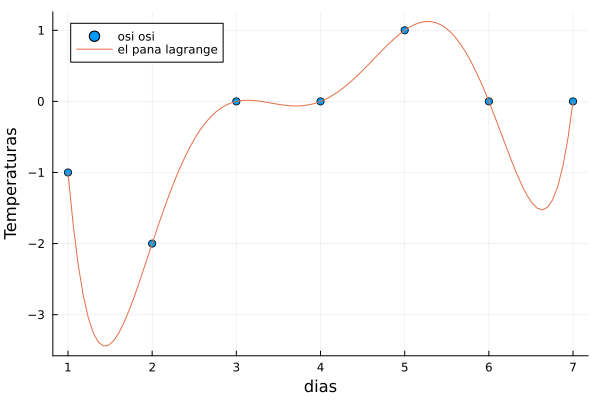

In [65]:
using Plots

y = temps_media
x = [1, 2, 3 , 4, 5, 6, 7]

function lagrange(x, y, z)
    n = length(x)
    total = 0
    for i in 1:n
        multiplicacion = y[i]
        for j in 1:n
            if i !=j
                multiplicacion *= (z - x[j])/ (x[i]-x[j])
            end
        end
        total += multiplicacion
    end
    return total
end
intex = sort(vcat(x, range(minimum(x), stop=maximum(x), length=100)))
intey = [lagrange(x, y, z) for z in intex]

scatter(x, y, label="osi osi")
plot!(intex, intey, label="el pana lagrange", xlabel="dias", ylabel="Temperaturas")